# Q_Learning for Policy IV

In [1]:
import numpy as np
import random
from random import sample
import math 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def reset():
    st= [0]*16
    return tuple(st)

In [3]:
weibull_scale=(2365.08,996.88,713.55,1406.84,343.76,3933.12,828.19,2040.95)
weibull_shape=(414.16,109.25,79.81,115.21,169.81,143.60,43.83,296.48)
tf=(2,6.5,2.5,6,5,3.5,3,3.5)
tp=(0.4,5.42,0.625,0.857,1.25,0.7,0.429,0.875)
time_interval=5
running_time=100000

In [4]:
fi = [[0,2],[2,7],[2,4],[6,5],[3,1]]

In [5]:
def member(i , fi):
    mem=[]
    if i in fi[0]:
        if i !=fi[0][0]:
            mem.append(fi[0][0])
        if i !=fi[0][1]:
            mem.append(fi[0][1])
        
    if i in fi[1]:
        if i !=fi[1][0]:
            mem.append(fi[1][0])
        if i !=fi[1][1]:
            mem.append(fi[1][1])
        
    if i in fi[2]:
        if i !=fi[2][0]:
            mem.append(fi[2][0])
        if i !=fi[2][1]:
            mem.append(fi[2][1])
    
    if i in fi[3]:
        if i !=fi[3][0]:
            mem.append(fi[3][0])
        if i !=fi[3][1]:
            mem.append(fi[3][1])
    
    if i in fi[4]:
        if i !=fi[4][0]:
            mem.append(fi[4][0])
        if i !=fi[4][1]:
            mem.append(fi[4][1])
    
    return mem
    

In [6]:
def CountFrequency(my_list):
 
    # Creating an empty dictionary
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
 
    for key, value in freq.items():
        print ("% d : % d"%(key, value))
 

In [7]:
def env(action,st):
    reward = np.zeros(8)
    failure_time = np.zeros(8)
    
    for a in range(8):
        if (action[a] == 1):
            for j in range(len(member(a,fi))):
                action[member(a,fi)[j]] = 1
                
            
        failure_time[a] = random.weibullvariate(weibull_scale[a],weibull_shape[a])

        if failure_time[a] <= st[a]: # fail
            st[a+8]=1

            tpi = 0 
            for j in range(len(member(a,fi))):
                tpi+=tp[member(a,fi)[j]]

            tfi = 0
            for j in range(len(member(a,fi))):
                tfi+=tf[member(a,fi)[j]]

            reward[a] =- (time_interval/(0.8*time_interval*sum((tpi,tp[a]))))*time_interval*math.ceil(0.8*sum((tfi,tf[a]))/time_interval)

            
        else :
            #st[a+8]=0
            st[a] +=5
            reward[a] = 5
            
            
        if action[a]==1:            
            if (st[a+8]==0):
                tpi = 0 
                for j in range(len(member(a,fi))):
                    tpi+=tp[member(a,fi)[j]]
                reward[a] = - (time_interval/(0.8*time_interval*sum((tpi,tp[a]))))*0.8*sum((tpi,tp[a]))
            
            if (st[a+8]==1):
                tpi = 0 
                for j in range(len(member(a,fi))):
                    tpi+=tp[member(a,fi)[j]]

                tfi = 0
                for j in range(len(member(a,fi))):
                    tfi+=tf[member(a,fi)[j]]

                reward[a] =- (time_interval/(0.8*time_interval*sum((tpi,tp[a]))))*time_interval*math.ceil(0.8*sum((tfi,tf[a]))/time_interval)

                
            st[a]=0
            st[a+8]=0  

    
    return (tuple(st) , reward)
        

In [8]:
def choose_action(epsilon, state):
    action = np.zeros(8)
    
    for i in range(8):
        if state[i+8]==1:
            action[i] = 1
        
        else: 
            if (np.random.random() < epsilon):
                action[i] = random.choice([0,1]) 
            else:
                st = (state[i],state[i+8])
                if i == 0:
                    action[i]= np.argmax(Q_table_tire[st])
                if i== 1:
                    action[i]= np.argmax(Q_table_transmission[st])
                if i == 2:
                    action[i]= np.argmax(Q_table_wheel[st])
                if i == 3:
                    action[i]= np.argmax(Q_table_coupling[st])
                if i == 4:
                    action[i]= np.argmax(Q_table_motor[st])
                if i == 5:
                    action[i]= np.argmax(Q_table_brake[st])
                if i == 6:
                    action[i]= np.argmax(Q_table_steering[st])
                if i == 7:
                    action[i]= np.argmax(Q_table_gears[st])
    return action    
    

In [9]:
Q_table_tire = np.zeros((100000 ,2) + (2,))
Q_table_transmission = np.zeros((100000 ,2) + (2,))
Q_table_wheel = np.zeros((100000 ,2) + (2,))
Q_table_coupling = np.zeros((100000 ,2) + (2,))
Q_table_motor = np.zeros((100000 ,2) + (2,))
Q_table_brake = np.zeros((100000 ,2) + (2,))
Q_table_steering = np.zeros((100000 ,2) + (2,))
Q_table_gears = np.zeros((100000 ,2) + (2,))

In [10]:
num_episodes=1000
min_lr=0.1 
discount=0.50
decay=25

In [11]:
def get_learning_rate( t):
    
    """Gets value for learning rate. It declines as we advance in episodes."""
    # Learning rate also declines as we add more episodes
    return max(min_lr, min(1., 1. - math.log10((t + 1) / decay)))


# transmission and coupling

In [12]:
scores = []

# Looping for each episode
for e in range(500):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1) 
    
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state)
        # Take action
        obs , reward = env(action , list(current_state))
        rewards.append(reward[1])
        new_state = obs
        
        current_state1 = (current_state[1],current_state[1+8])
        new_state1 = (new_state[1],new_state[1+8])
        # Update Q(S,A)
        Q_table_transmission[current_state1][int(action[1])] += (learning_rate * 
                                        (reward[1] 
                                         + discount * np.max(Q_table_transmission[new_state1]) 
                                         - Q_table_transmission[current_state1][int(action[1])]))
        
        current_state3 = (current_state[3],current_state[3+8])
        new_state3 = (new_state[3],new_state[3+8])
        # Update Q(S,A)
        Q_table_coupling[current_state3][int(action[3])] += (learning_rate * 
                                        (reward[3] 
                                         + discount * np.max(Q_table_coupling[new_state3]) 
                                         - Q_table_coupling[current_state3][int(action[3])]))
        
        
        current_state = new_state
       
    scores.append(sum(rewards))


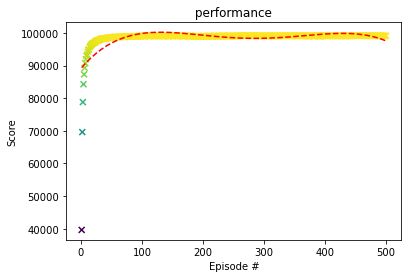

In [13]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance ')
plt.show()

In [14]:
def ac (current_state):
    action = np.zeros(8)
    action[1] = np.argmax(Q_table_transmission[(current_state[1],current_state[1+8])])
    action[3] = np.argmax(Q_table_coupling[(current_state[3],current_state[3+8])])
    return action

In [15]:
#transmission
time_replace = []
current_state = reset()
action = np.zeros(8)
for j in range(50000):
    action[[1,3]] = max(ac(current_state)[[1,3]])
    if action[1] ==1:
        time_replace.append(current_state[1])
    obs , r = env(action,list(current_state))
    current_state = obs
CountFrequency(time_replace)

 985 :  182
 975 :  11
 965 :  8
 970 :  14
 980 :  32
 945 :  1
 950 :  1
 960 :  1
 955 :  2
 940 :  1


In [16]:
#coupling
time_replace = []
current_state = reset()
action = np.zeros(8)
for j in range(50000):
    action[[1,3]] = max(ac(current_state)[[1,3]])
    if action[3] ==1:
        time_replace.append(current_state[3])
    obs , r = env(action,list(current_state))
    #print (current_state[5] ,action[5],r[5],obs[5] )
    current_state = obs
CountFrequency(time_replace)

 985 :  211
 980 :  18
 965 :  5
 975 :  10
 970 :  5
 955 :  3
 960 :  1


# brake and sterring wheel

In [18]:
scores = []

# Looping for each episode
for e in range(400):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1) 
    
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state)
        # Take action
        obs , reward = env(action , list(current_state))
        #rewards.append(reward[1])
        new_state = obs
        
        current_state5 = (current_state[5],current_state[5+8])
        new_state5 = (new_state[5],new_state[5+8])
        # Update Q(S,A)
        Q_table_brake[current_state5][int(action[5])] += (learning_rate * 
                                        (reward[5] 
                                         + discount * np.max(Q_table_brake[new_state5]) 
                                         - Q_table_brake[current_state5][int(action[5])]))
        
        current_state6 = (current_state[6],current_state[6+8])
        new_state6 = (new_state[6],new_state[6+8])
        # Update Q(S,A)
        Q_table_steering[current_state6][int(action[6])] += (learning_rate * 
                                        (reward[6] 
                                         + discount * np.max(Q_table_steering[new_state6]) 
                                         - Q_table_steering[current_state6][int(action[6])]))
        
        
        current_state = new_state
       
    #scores.append(sum(rewards))


In [24]:
def ac (current_state):
    action = np.zeros(8)
    action[5] = np.argmax(Q_table_brake[(current_state[5],current_state[5+8])])
    action[6] = np.argmax(Q_table_steering[(current_state[6],current_state[6+8])])
    return action

In [25]:
#brake
time_replace = []
current_state = reset()
action = np.zeros(8)
for j in range(50000):
    action[[5,6]] = max(ac(current_state)[[5,6]])
    if action[5] ==1:
        time_replace.append(current_state[5])
    obs , r = env(action,list(current_state))
    #print (current_state[5],current_state[6] ,action[5],r[5],obs[5] )
    current_state = obs
CountFrequency(time_replace)

 780 :  276
 770 :  7
 750 :  3
 730 :  2
 765 :  5
 775 :  14
 720 :  1
 745 :  2
 760 :  5
 755 :  3
 740 :  1


In [21]:
#steering
time_replace = []
current_state = reset()
action = np.zeros(8)
#for j in range(20000):
for j in range(50000):
    action[[5,6]] = max(ac(current_state)[[5,6]])
    if action[6] ==1:
        time_replace.append(current_state[6])
    obs , r = env(action,list(current_state))
    #print (current_state[6] ,action[6],r[6],obs[6] )
    current_state = obs
CountFrequency(time_replace)

 780 :  171
 870 :  7
 865 :  25
 860 :  4


# Tire and Wheel rim and motor and shifting gears

In [26]:
# Looping for each episode
for e in range(300):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1) 
    
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state)
        # Take action
        obs , reward = env(action , list(current_state))
        #rewards.append(reward[1])
        new_state = obs
        
        current_state0 = (current_state[0],current_state[0+8])
        new_state0 = (new_state[0],new_state[0+8])
        # Update Q(S,A)
        Q_table_tire[current_state0][int(action[0])] += (learning_rate * 
                                        (reward[0] 
                                         + discount * np.max(Q_table_tire[new_state0]) 
                                         - Q_table_tire[current_state0][int(action[0])]))
        
        current_state2 = (current_state[2],current_state[2+8])
        new_state2 = (new_state[2],new_state[2+8])
        # Update Q(S,A)
        Q_table_wheel[current_state2][int(action[2])] += (learning_rate * 
                                        (reward[2] 
                                         + discount * np.max(Q_table_wheel[new_state2]) 
                                         - Q_table_wheel[current_state2][int(action[2])]))
        
        current_state4 = (current_state[4],current_state[4+8])
        new_state4 = (new_state[4],new_state[4+8])
        # Update Q(S,A)
        Q_table_motor[current_state4][int(action[4])] += (learning_rate * 
                                        (reward[4] 
                                         + discount * np.max(Q_table_motor[new_state4]) 
                                         - Q_table_motor[current_state4][int(action[4])]))
        
        current_state7 = (current_state[7],current_state[7+8])
        new_state7 = (new_state[7],new_state[7+8])
        # Update Q(S,A)
        Q_table_gears[current_state7][int(action[7])] += (learning_rate * 
                                        (reward[7] 
                                         + discount * np.max(Q_table_gears[new_state7]) 
                                         - Q_table_gears[current_state7][int(action[7])]))
        
        
        current_state = new_state
 

In [50]:
def ac (current_state):
    action = np.zeros(8)
    action[0] = np.argmax( Q_table_tire[(current_state[0],current_state[0+8])])
    action[2] = np.argmax(Q_table_wheel[(current_state[2],current_state[2+8])])
    action[4] = np.argmax(Q_table_motor[(current_state[4],current_state[4+8])])
    action[2] = np.argmax(Q_table_gears[(current_state[7],current_state[7+8])])
    return action

In [32]:
#tire
time_replace = []
current_state = reset()
action = np.zeros(8)
for j in range(50000):
    action[[0,2]] = max(ac(current_state)[[0,2]])
    if action[0] ==1 :
        time_replace.append(current_state[0])
        
    obs , r = env(action,list(current_state))
    #print (current_state[0] ,action[0],r[0],obs[0] )
    current_state = obs
CountFrequency(time_replace)

 680 :  8
 715 :  75
 720 :  64
 685 :  6
 710 :  71
 700 :  26
 725 :  17
 695 :  18
 675 :  2
 690 :  11
 705 :  46
 670 :  1
 660 :  1
 730 :  3


In [34]:
#wheel rim 
time_replace = []
current_state = reset()
action = np.zeros(8)
for j in range(50000):
    action = np.zeros(8)
    action[[4,2]] = max(ac(current_state)[[4,2]])
    if action[2] ==1 :
        time_replace.append(current_state[2])
    obs , r = env(action,list(current_state))
    #print (current_state[2] ,action[[2,4]],r[2],obs[2] )
    current_state = obs
CountFrequency(time_replace)

 340 :  712
 680 :  6


In [47]:
#motor
time_replace = []
current_state = reset()
action = np.zeros(8)
for j in range(50000):
    action[[4,2]] = max(ac(current_state)[[4,2]])
    if action[4] ==1:
        time_replace.append(current_state[4])
        
    obs , r = env(action,list(current_state))
    #print (current_state[4] ,action[4],r[4],obs[4] )
    current_state = obs
CountFrequency(time_replace)

 340 :  715
 335 :  9


In [53]:
#shifting gears
time_replace = []
current_state = reset()
action = np.zeros(8)
for j in range(50000):
    action[[7,2]] = max(ac(current_state)[[7,2]])
    if action[7] ==1:
        time_replace.append(current_state[7])
        
    obs , r = env(action,list(current_state))
    #print (current_state[7] ,action[7],r[7],obs[7] )
    current_state = obs
CountFrequency(time_replace)

 680 :  364
